In [76]:
%run plot_events_functions.py

In [77]:
#init variable storage class
vars = VariableStorage()

Define folder for detected mhw netcdf files and the original mhw intensity netcdf files

In [78]:
vars.mhw_zones_folder = '/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/for_XHEAT/events/'
vars.mhw_intensity_folder = '/media/data_HDD/joaop/MHW_detection/data/mhw_hobday_data/'

vars.mask_fullpath = '/media/data_HDD/joaop/MHW_detection/data/masks_NA/mask_10N_80N_90W_70E.nc'
vars.longhurst_path = '/home/joaop/dev/JP/PROVINCES/'+'NA_longhurst.shp'

vars.output_video_path = '/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/for_XHEAT/videos/'

Video Parameters

In [79]:
#downsample video for faster rendering: (lat, lon)=(1000/downsample_ratio, 2000/downsample_ratio)
vars.downsample_ratio=1
#frames per second
vars.fps=5

Choose the mhw ID you want to render 

In [80]:
""" #mhw possible keys:
file_list = impf.get_files_with_substring(vars.mhw_zones_folder, '.nc')
ID_list= [os.path.splitext(filename)[0] for filename in file_list]

#filter files by year and sort
ID_list = filter_files_by_year(ID_list, start_year=2017, end_year=2019)
ID_list = sorted(ID_list, key=lambda x: int(x.split('_')[-1]))

vars.ID='NASW_POS_2018_MAR_000224' # or ID_list[some_index] """

" #mhw possible keys:\nfile_list = impf.get_files_with_substring(vars.mhw_zones_folder, '.nc')\nID_list= [os.path.splitext(filename)[0] for filename in file_list]\n\n#filter files by year and sort\nID_list = filter_files_by_year(ID_list, start_year=2017, end_year=2019)\nID_list = sorted(ID_list, key=lambda x: int(x.split('_')[-1]))\n\nvars.ID='NASW_POS_2018_MAR_000224' # or ID_list[some_index] "

Create Video (For one MHW)

In [81]:
#create_one_mhw_video(vars)

Create Video with all mhws in a specific time period

In [82]:
import xarray as xr
file_paths = impf.get_files_with_substring(vars.mhw_zones_folder, 'EV')
file_paths=[vars.mhw_zones_folder+filepath for filepath in file_paths]

Define the year/date you want

In [83]:
y=2017

start_date = str(y)+'-01-01'
end_date = str(y)+'-01-31'

vars.ID = f'Events_{start_date}_to_{end_date}'

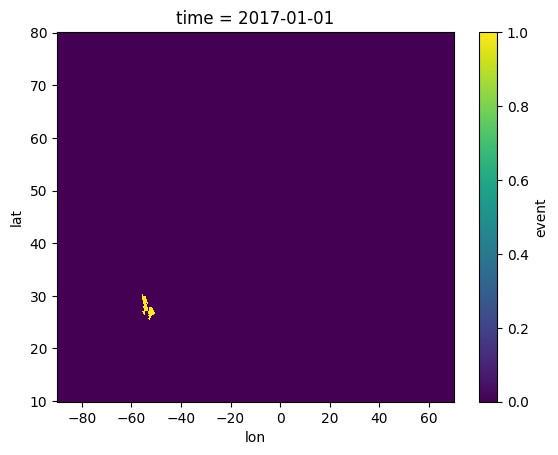

In [84]:
chunk = xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/for_XHEAT/events/EV_000002_JAN_2017.nc')
chunk.event.isel(time=0).plot()

Run to get video for those dates

In [85]:
datasets, labels, IDs = load_and_filter_nc_files(file_paths, start_date, end_date)
ds_zero_pad = create_zero_filled_netcdf(datasets[0], start_date, end_date)
datasets.append(ds_zero_pad); del ds_zero_pad
summed_data = sum_nc_datasets(datasets); del datasets
print(f'{y}: {len(summed_data.time.values)} days')

2017: 31 days


In [86]:
%run plot_events_functions.py

In [87]:
os.makedirs(vars.output_video_path, exist_ok=True)
output_nc_path = vars.output_video_path+vars.ID+'.nc'
if os.path.exists(output_nc_path): os.remove(output_nc_path)
summed_data.to_netcdf(output_nc_path); summed_data.close()

create_one_mhw_video(vars, labels=labels, IDs=IDs)
os.remove(output_nc_path)

In [88]:
for y in range(2017, 2017+1):
    start_date = str(y)+'-01-01'
    end_date = str(y)+'-12-31'
    
    """ start_date = '2018-01-01'
    end_date = '2018-02-01' """
    vars.ID = f'events_{start_date}_to_{end_date}'

    datasets, labels, IDs = load_and_filter_nc_files(file_paths, start_date, end_date)
    ds_zero_pad = create_zero_filled_netcdf(datasets[0], start_date, end_date)
    datasets.append(ds_zero_pad); del ds_zero_pad
    summed_data = sum_nc_datasets(datasets)
    print(f'{y}: {len(summed_data.time.values)} days')
    
    for ds in datasets: ds.close()
    del datasets

    # Convert summed_data to a 3D numpy array for video creation
    #data_array = summed_data.to_array().values[0] #é preciso?????

    output_nc_path = vars.output_video_path+vars.ID+'.nc'
    if os.path.exists(output_nc_path): os.remove(output_nc_path)
    summed_data.to_netcdf(output_nc_path); summed_data.close()
    
    create_one_mhw_video(vars, labels=labels, IDs=IDs)
    os.remove(output_nc_path)

: 